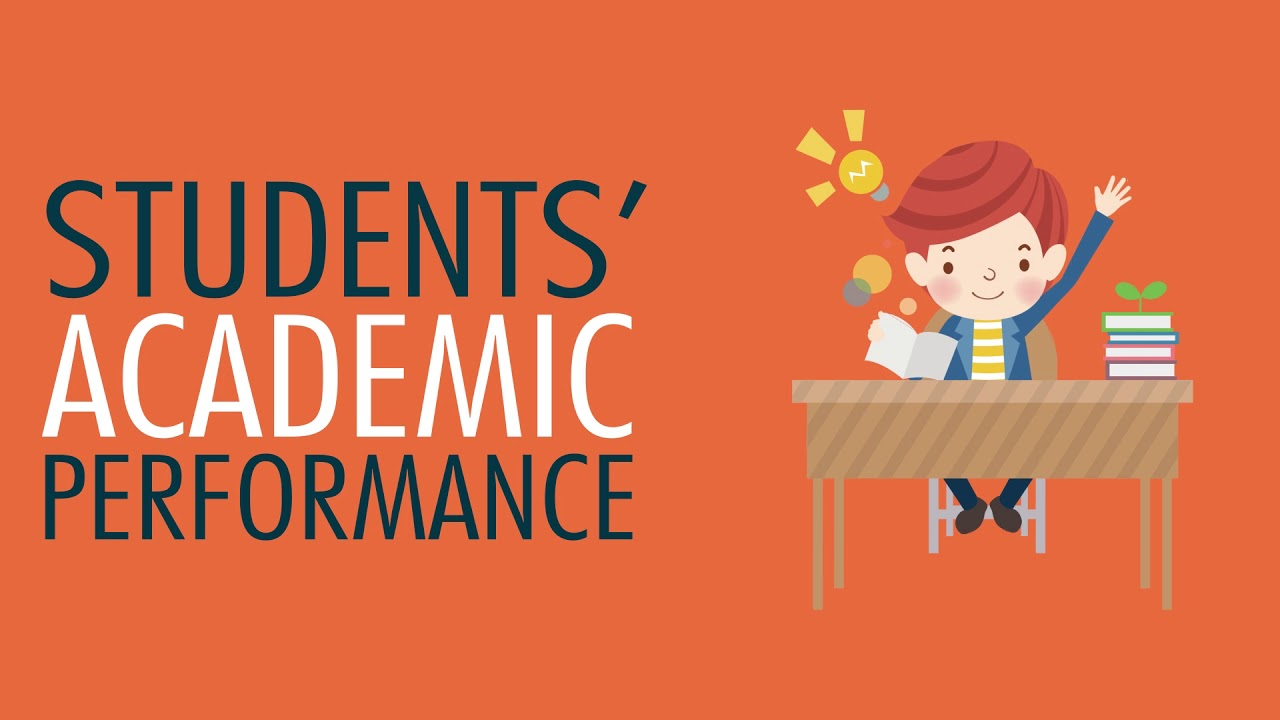

In [ ]:
from IPython import display
display.Image("https://i.ytimg.com/vi/UM5bxbosgD8/maxresdefault.jpg", width=650, height=375)

<h2>Basic Info</h2>
<p>This dataset contains information on students math and portuguese language courses in seconday school (equivalent of highschool). The students are either from Gabriel Pereira or Mousinho da Silveira Seconday School which are both schools in Portugal. It should be noted that drinking laws are different in Portugal. They have 2 legal drinking ages, one at 16 for wine and beer and 18 for all types of alcoholic beverages. For this project, we will only be focusing on students in math courses.</p>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# loading dataset
math_url = 'https://raw.githubusercontent.com/martinn8145/undecided/main/student-mat.csv'

math_df = pd.read_csv(math_url)

math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# changing all ints to floats
math_types = math_df.dtypes

math_df = math_df.astype({
    "age": 'float', 
    "Medu": 'float', 
    "Fedu": 'float', 
    "traveltime": 'float', 
    "studytime": 'float', 
    "failures": 'float', 
    "famrel": 'float',
    "freetime": 'float',
    "goout": 'float',
    "Dalc": 'float',
    "Walc": 'float',
    "health": 'float',
    "absences": 'float',
    "G1": 'float',
    "G2": 'float',
    "G3": 'float'
    })
math_types

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
# summing the grades and making them out of 100 
math_df['totalGrade'] = (math_df.G1 + math_df.G2 + math_df.G3) * (5/3)
math_df.iloc[:,-4:]

,G1,G2,G3,totalGrade
0,5.0,6.0,6.0,28.333333
1,5.0,5.0,6.0,26.666667
2,7.0,8.0,10.0,41.666667
3,15.0,14.0,15.0,73.333333
4,6.0,10.0,10.0,43.333333
...,...,...,...,...
390,9.0,9.0,9.0,45.000000
391,14.0,16.0,16.0,76.666667
392,10.0,8.0,7.0,41.666667
393,11.0,12.0,10.0,55.000000


In [ ]:
math_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.0,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.0,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.0,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.0,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.0,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


<h3>From looking at describe we can observe a couple of points about the dataset:</h3>
<ul>
    <li>Average age of students is 16-17.</li>
    <li>The average study time is 2-5 hours a week (Study time was measured on a scale of 1-5 with 2 being between 2-5 hours a week)</li>
    <li>The average test grade for first, second, and final range from 10-11, with it slowly trending down from first to final grade (Grades are out of 20)</li>
</ul>

<h2>Basic Data Exploration</h2>
<p>This is to find more possible observations on the dataset that can't be seen through describe</p>

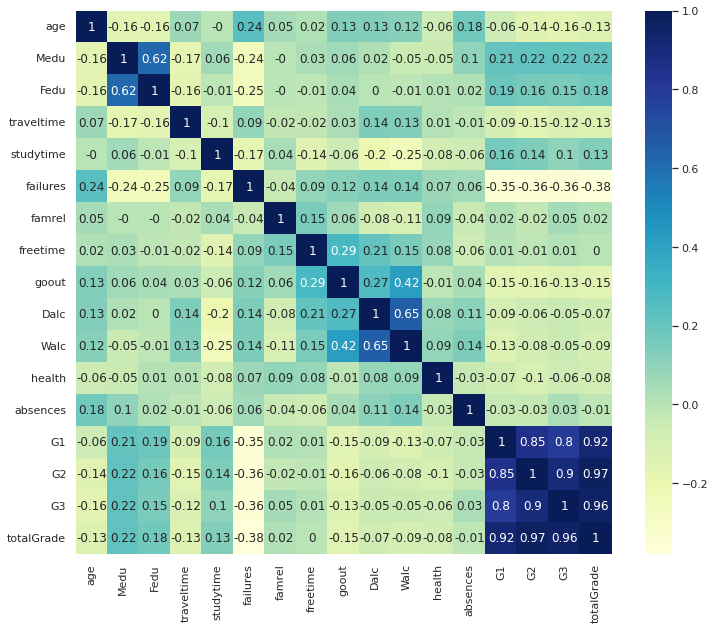

In [ ]:
sns.set(rc={"figure.figsize": (12, 10)})
correlations = math_df.corr()
sns.heatmap(correlations.round(2), annot=True, cmap="YlGnBu")
plt.show()

**Positive Correlations:**
- G1 and G3 (0.8) & G2 and G3 (0.85) & G2 and G3 (0.9)  -> A student's grades in one period will affect their grades in other periods  
- Dalc and Walc (0.65) -> If you drink a lot on the weekdays then you probably also drink a lot on the weekends and vice versa  
-Fedu and Medu (0.62) -> One parent will usually have the same level of education as the other  
-Walc and goout (0.42) & Dalc and goout (0.27) -> Students who go out tend to drink  
-goout and freetime (0.29) -> Students go out more when they have more free time   
-Age and failures (0.24) -> Students who are older tend to have more failures  
-G1,G2,G3 and Medu (0.21, 0.22, 0.22) -> Grades of students are higher when Mother's education level is higher  
  
**Negative Correlations:** 
- G1,G2,G3 and failures (-0.35, -0.36, -0.36) -> Those who experience less failures tend to do better  
- Walc and Studytime (-0.25) & Dalc and Studytime (0.2) -> More drinking leads to less studying  
- Medu and failures (-0.24) & Fedu and failures (-0.25) -> Higher education level of parents means less failures  

**G1 and G3 (0.8) & G2 and G3 (0.85) & G2 and G3 (0.9) -> A student's grades in one period will affect their grades in other periods**

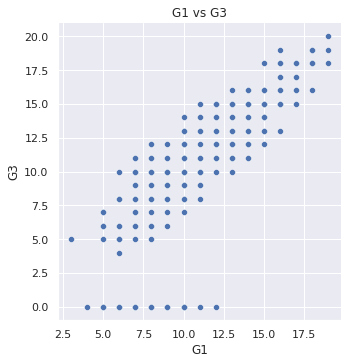

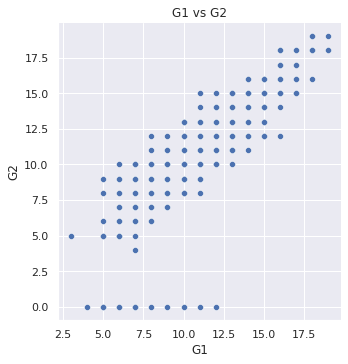

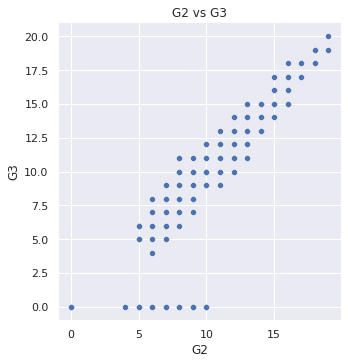

In [ ]:
sns.relplot(
    data=math_df,
    x='G1',
    y='G3',
    aspect=1,
    palette='colorblind'
)
plt.title("G1 vs G3");
sns.relplot(
    data=math_df,
    x='G1',
    y='G2',
    aspect=1,
    palette='colorblind'
)
plt.title("G1 vs G2");
sns.relplot(
    data=math_df,
    x='G2',
    y='G3',
    aspect=1,
    palette='colorblind'
)
plt.title("G2 vs G3");

As seen from the scatter plots above, there is a positive correlation that can be seen here from G1-G3. A student's grade in one period will positively correlate with their grade in the other periods.

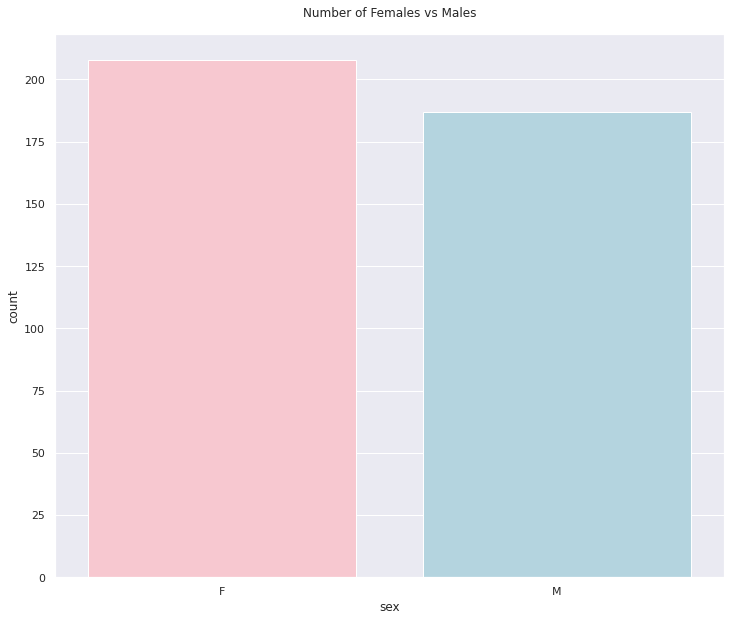

In [ ]:
sex_plt = ['pink','#add8e6']
sex_dist = sns.countplot(x = 'sex',
              data = math_df,
              palette = sex_plt
              )
sex_dist.set_title('Number of Females vs Males', y = 1.02);

# **Analysis of Personal Life vs Academic Performance**
In the following section, we will explore a couple of the personal life factors that might have a correlation with student math grades. For this project, personal life factors will mostly be defined by the circumstances students are under while in school. 

**Study time vs Grades (0.13)**

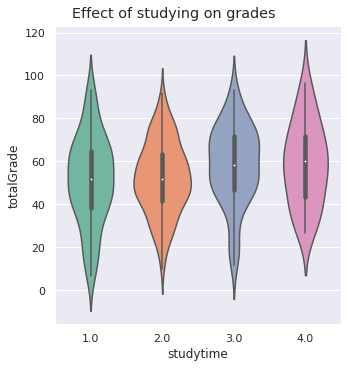

In [ ]:
study = sns.catplot(
    kind = 'violin',
    data = math_df,
    x = 'studytime',
    y = 'totalGrade',
    palette = "Set2"
)
study.fig.suptitle('Effect of studying on grades', y = 1.02);

From the violin plots, we can see that time spent studying had a small positive correlation with grades. This was true across G1, G2, and G3 grades, and so we plotted the totalGrade for convenience and readability purposes.

**Free time, and its correlation with student grades (0.00)**

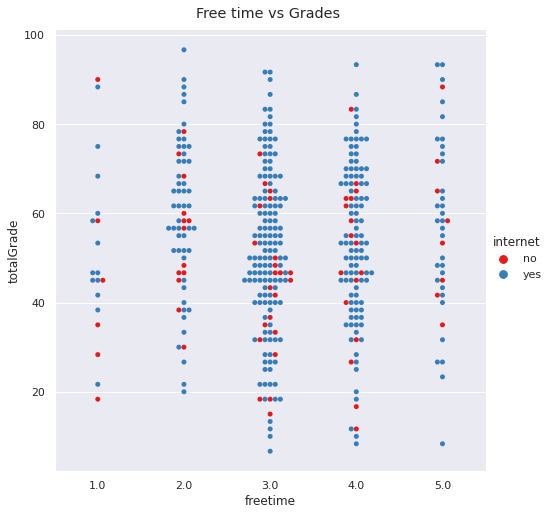

In [ ]:
free = sns.catplot(
    kind = 'swarm',
    data = math_df,
    x = 'freetime',
    y = 'totalGrade',
    palette = "Set1",
    hue = 'internet',
    height = 7
)
free.fig.suptitle('Free time vs Grades', y = 1.02);

Using a swarm plot, we can see that the majority of students believe that they have "average" free time, and the grades do not correlate with lack or abundance of free time. 

**Smaller family sizes performed better on average, but possibly due to less overall data**

Text(0.5, 1.1, 'Family Size vs G3 ')

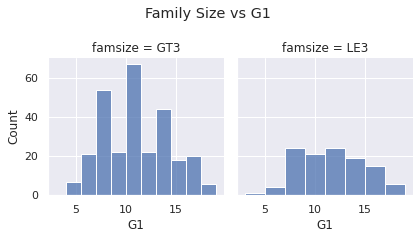

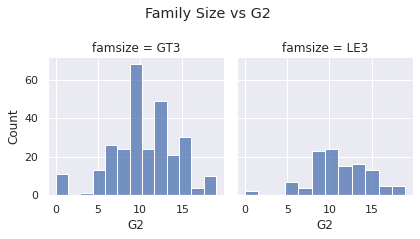

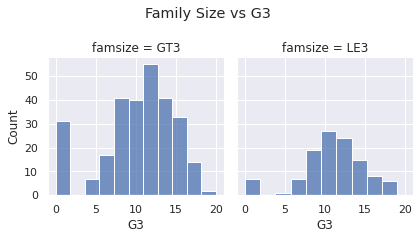

In [ ]:
fam_size = sns.FacetGrid(math_df, col='famsize')
fam_size.map(sns.histplot, 'G1')
fam_size.fig.suptitle("Family Size vs G1 ", y = 1.1)

fam_size = sns.FacetGrid(math_df, col='famsize')
fam_size.map(sns.histplot, 'G2')
fam_size.fig.suptitle("Family Size vs G2 ", y = 1.1)

fam_size = sns.FacetGrid(math_df, col='famsize')
fam_size.map(sns.histplot, 'G3')
fam_size.fig.suptitle("Family Size vs G3 ", y = 1.1)

**Most students chose mother as guardian, which did not strongly affect performance**

Text(0.5, 1.1, 'Guardian vs G3')

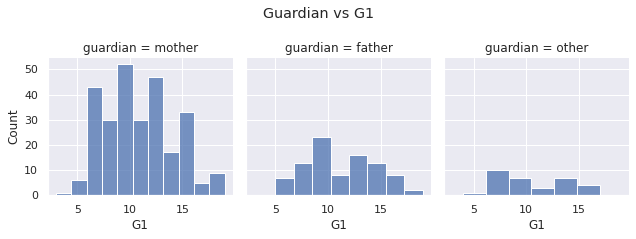

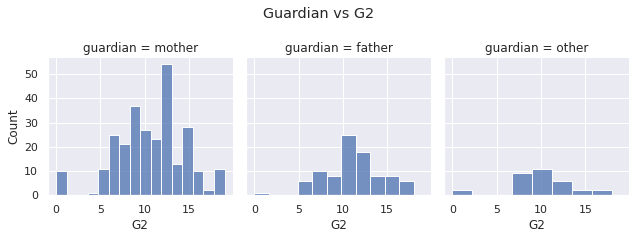

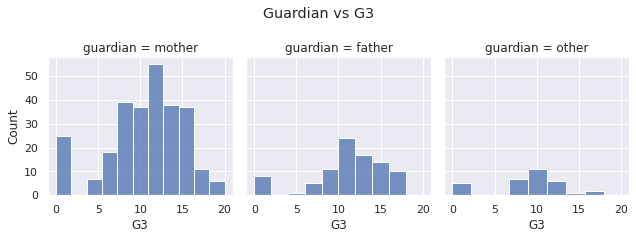

In [ ]:
guardian = sns.FacetGrid(math_df, col='guardian')
guardian.map(sns.histplot, 'G1')
guardian.fig.suptitle("Guardian vs G1", y = 1.1)

guardian = sns.FacetGrid(math_df, col='guardian')
guardian.map(sns.histplot, 'G2')
guardian.fig.suptitle("Guardian vs G2", y = 1.1)

guardian = sns.FacetGrid(math_df, col='guardian')
guardian.map(sns.histplot, 'G3')
guardian.fig.suptitle("Guardian vs G3", y = 1.1)

**Plots for reasons for choosing their respective schools, and their affect on student grades**

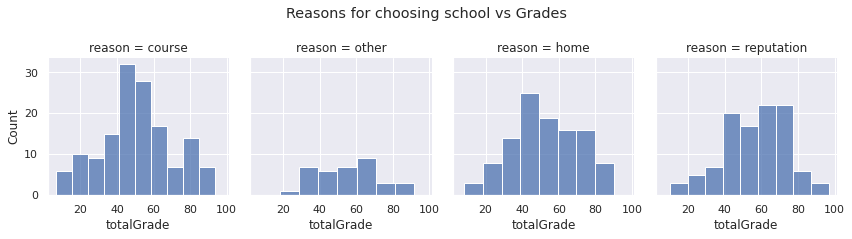

In [ ]:
reason = sns.FacetGrid(math_df, col='reason')
reason.map(sns.histplot, 'totalGrade')
reason.fig.suptitle("Reasons for choosing school vs Grades", y = 1.1);

During the study, one of the questions was "Why did you choose this school?". The plots above show the different reasons, and how the grades are correlated. The only small conclusion we can draw is that those who chose reputation as their reason for picking the school tended to perform better on average than those who had other reasons.

**Fedu and Medu (0.62) -> One parent will usually have the same level of education as the other**

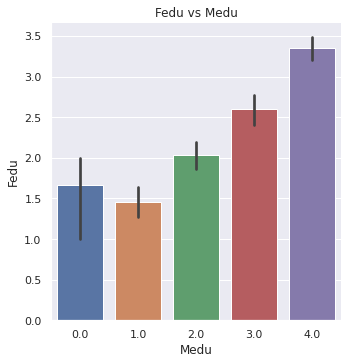

In [ ]:
sns.catplot(
    data=math_df,
    x='Medu',
    y='Fedu',
    kind='bar'
)
plt.title("Fedu vs Medu");

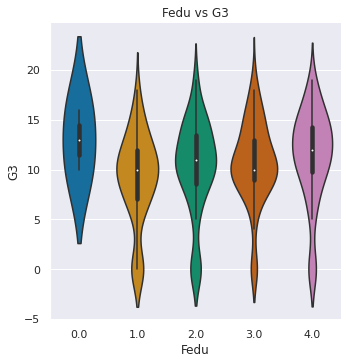

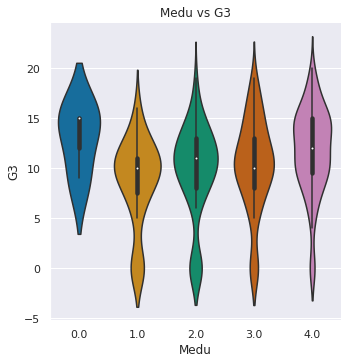

In [ ]:
sns.catplot(
    data=math_df,
    x='Fedu',
    y='G3',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
plt.title("Fedu vs G3");
sns.catplot(
    data=math_df,
    x='Medu',
    y='G3',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
plt.title("Medu vs G3");

While there is a positive correlation between the education of one parent in relation to the other. There is absolutely no correlation between the parent's education and the student's grades.

**G1,G2,G3 and Medu (0.21, 0.22, 0.22) -> Grades of students are higher when Mother's education level is higher**

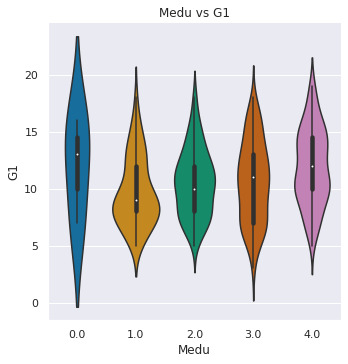

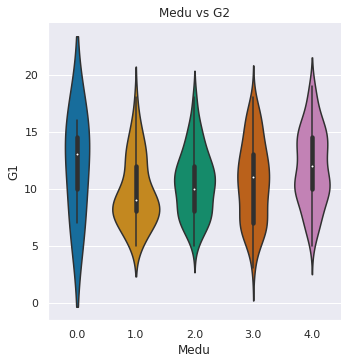

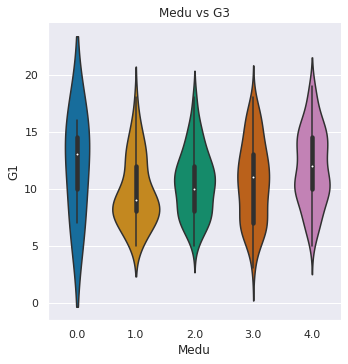

In [ ]:
sns.catplot(
    data=math_df,
    x='Medu',
    y='G1',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
plt.title("Medu vs G1");
sns.catplot(
    data=math_df,
    x='Medu',
    y='G1',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
plt.title("Medu vs G2");
sns.catplot(
    data=math_df,
    x='Medu',
    y='G1',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
plt.title("Medu vs G3");

Looks like student's who come from families where the mother is either highly educated or not at all have better grades.

**Medu and failures (-0.24) & Fedu and failures (-0.25) -> Higher education level of parents means less failures**

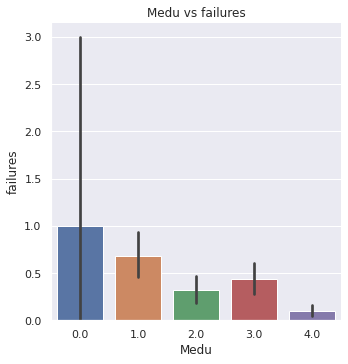

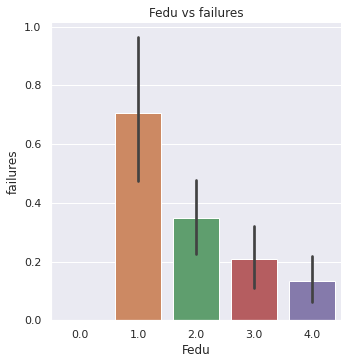

In [ ]:
sns.catplot(
    data=math_df,
    x='Medu',
    y='failures',
    kind='bar',
)
plt.title("Medu vs failures");

sns.catplot(
    data=math_df,
    x='Fedu',
    y='failures',
    kind='bar',
)
plt.title("Fedu vs failures");

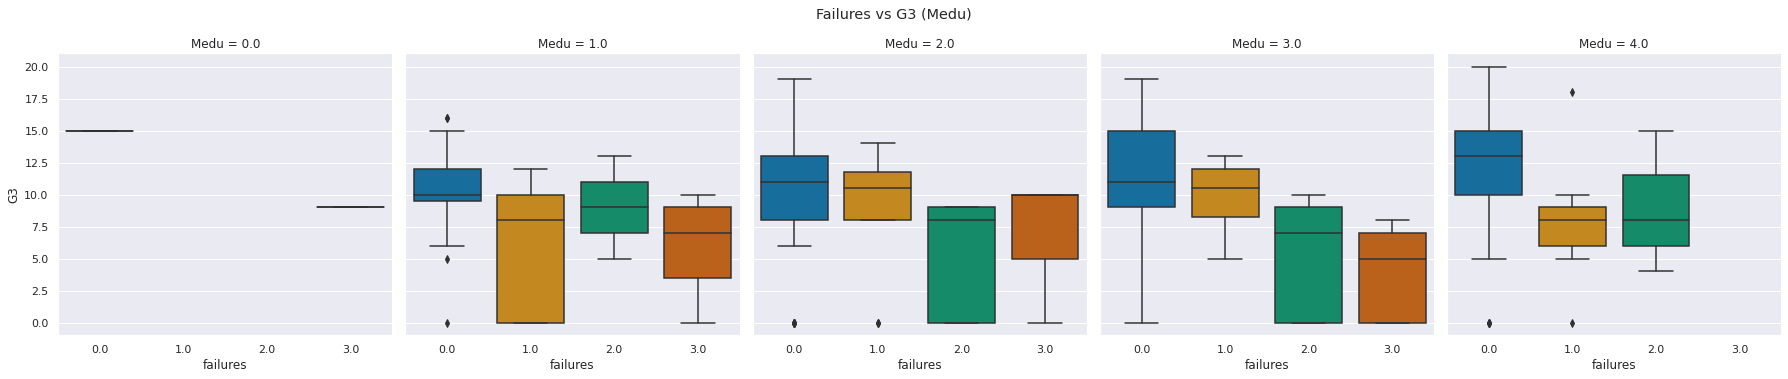

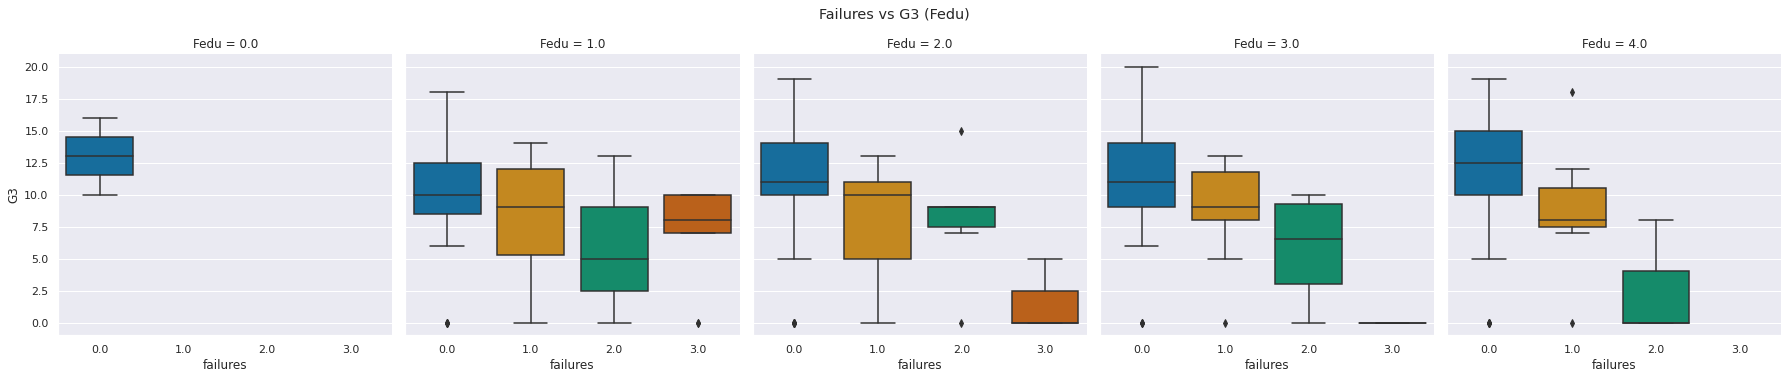

In [ ]:
g=sns.catplot(
    data=math_df,
    x='failures',
    y='G3',
    kind='box',
    col='Medu',
    aspect=1,
    palette='colorblind'
)
g.fig.suptitle("Failures vs G3 (Medu)", y=1.05);
g=sns.catplot(
    data=math_df,
    x='failures',
    y='G3',
    kind='box',
    col='Fedu',
    aspect=1,
    palette='colorblind'
)
g.fig.suptitle("Failures vs G3 (Fedu)", y=1.05);

Parent's education level seems to affect the amount of failures the students has. Also, we can see that failures affect the grades of a student inversely. So we can say that parent's education level indirectly affects the grades of a student.

**Summary:**

Both study time and free time alike had little to no correlation with student grades, despite seeming like strong factors in academic performance. Looking at some of the other plots, family size and guardian were also not strong factors in student performance. 
When it comes to parents' education, fathers and mothers tended to have the same level of education, and student grades were higher when their mother's education level was higher. In addition, higher education level in parents correlated with less failures.

#**Analysis of Social Life vs Academic Performance**
Here we look at aspects in a student's social life and see if any of those factors could affect the student's academic performance.

**Dalc and Walc (0.65) -> If you drink a lot on the weekdays then you probably also drink a lot on the weekends and vice versa**

Alcohol and social life go hand in hand and will be an important attribute that we can use as an alternative factor of connecting to final grades.

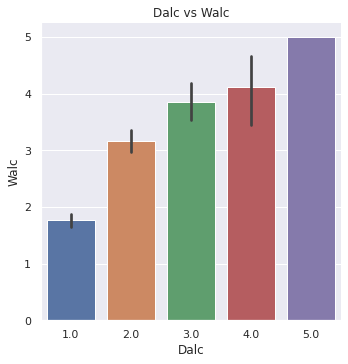

In [ ]:
sns.catplot(
    data=math_df,
    x='Dalc',
    y='Walc',
    kind='bar'
)
plt.title("Dalc vs Walc");

As it can be seen here, Dalc and Walc have a direct correlation with each other, as daily alcohol consumption goes up, it carries over to the weekends.

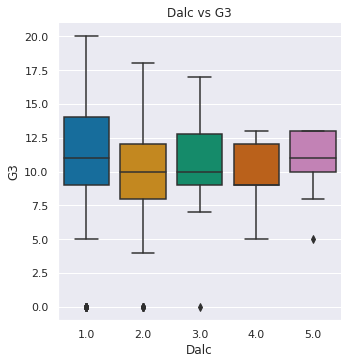

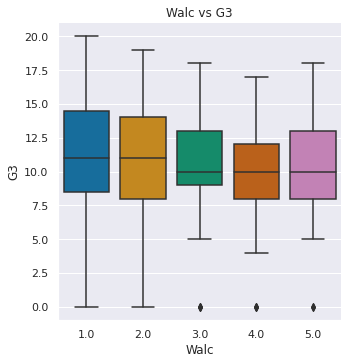

In [ ]:
sns.catplot(
    data=math_df,
    x='Dalc',
    y='G3',
    kind='box',
    aspect=1,
    palette='colorblind'
)
plt.title("Dalc vs G3");
sns.catplot(
    data=math_df,
    x='Walc',
    y='G3',
    kind='box',
    aspect=1,
    palette='colorblind'
)
plt.title("Walc vs G3");

Grades are more affected by weekday alcohol consumption than weekend alcohol consumption. This is likely because drinking can lead to being incapacitated for hours which leads to less studying and if the person gets a hang over, it can carry over to the next day. It seems like lower alcohol consumption won’t guarantee a good grade, but higher levels of alcohol consumption can definitely prevent achieving the highest grades.

**Walc and goout (0.42) & Dalc and goout (0.27) -> Students who go out tend to drink**

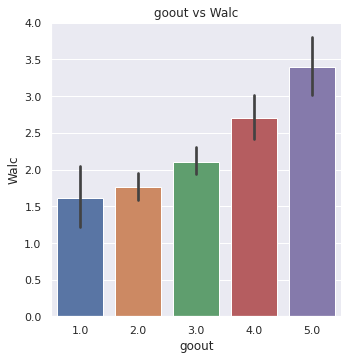

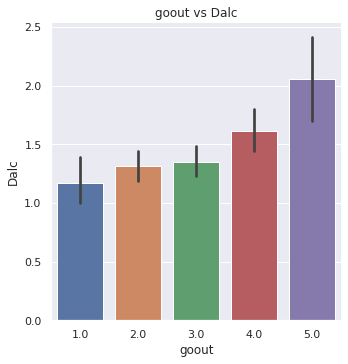

In [ ]:
sns.catplot(
    data=math_df,
    x='goout',
    y='Walc',
    kind='bar',
)
plt.title("goout vs Walc");
sns.catplot(
    data=math_df,
    x='goout',
    y='Dalc',
    kind='bar',
)
plt.title("goout vs Dalc");

This chart shows that when students go out, they often end up drinking alcohol. This could potentially be because students who go out often are looking to escape the stress of school and alcohol is probably one of the best ways to do this.

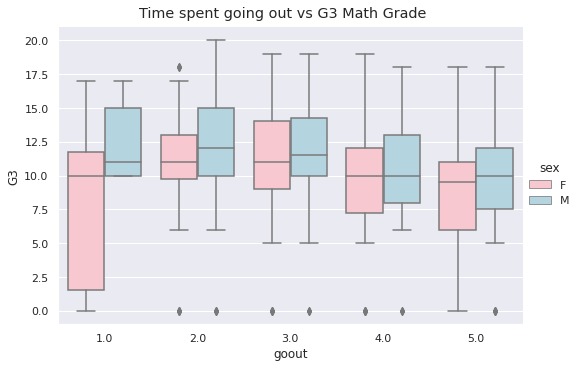

In [ ]:
out = sns.catplot(
    data = math_df,
    kind = 'box',
    x = 'goout',
    y = 'G3',
    hue = 'sex',
    palette = sex_plt,
    height = 5,
    aspect = 1.5
    )
out.fig.suptitle('Time spent going out vs G3 Math Grade', y = 1.02);

It seems like going out a moderate amount leads to better grades. When a student goes out too often or doesn’t go out at all, grades seem to be lower.

Some other observations from this plot. Firstly, males tended to perform better than females in the math department. As for time spent going out, the only noticeable difference is females going out the least tended to have the worst G3 Math scores by a large margin.

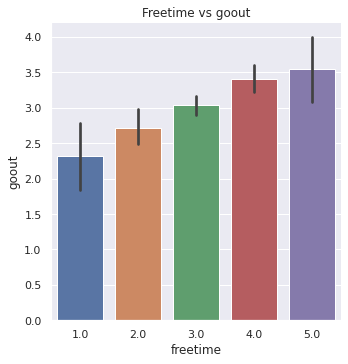

In [ ]:
sns.catplot(
    data=math_df,
    x='freetime',
    y='goout',
    kind='bar',
)
plt.title("Freetime vs goout");

We can see here that freetime is often used with going out.

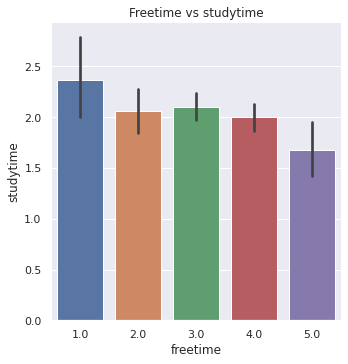

In [ ]:
sns.catplot(
    data=math_df,
    x='freetime',
    y='studytime',
    kind='bar',
)
plt.title("Freetime vs studytime");

While the opposite holds true with studytime. Students generally don't use their freetime for studying.

**Walc and Studytime (-0.25) & Dalc and Studytime (-0.2) -> More drinking leads to less studying**

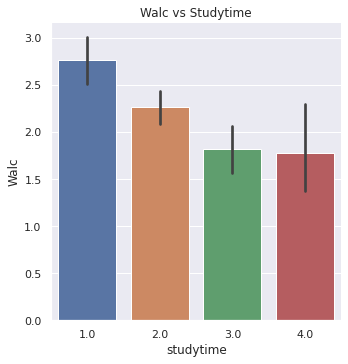

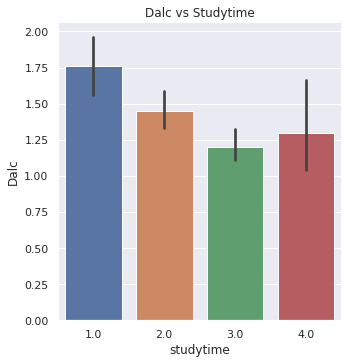

In [ ]:
sns.catplot(
    data=math_df,
    x='studytime',
    y='Walc',
    kind='bar',
)
plt.title("Walc vs Studytime");

sns.catplot(
    data=math_df,
    x='studytime',
    y='Dalc',
    kind='bar',
)
plt.title("Dalc vs Studytime");

Because of studytime have an inverse relationship with freetime and goout, it will also have an inverse relationship with alcohol consumption

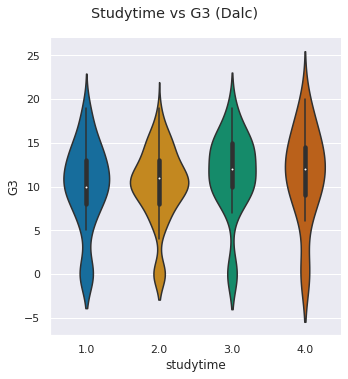

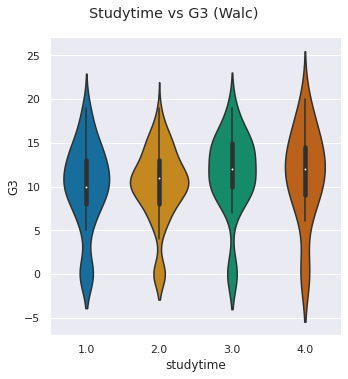

In [ ]:
g=sns.catplot(
    data=math_df,
    x='studytime',
    y='G3',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
g.fig.suptitle("Studytime vs G3 (Dalc)", y=1.05);
g=sns.catplot(
    data=math_df,
    x='studytime',
    y='G3',
    kind='violin',
    aspect=1,
    palette='colorblind'
)
g.fig.suptitle("Studytime vs G3 (Walc)", y=1.05);

The importance of finding these connections indirectly like this is seen in this chart. It's very hard to see if there's any real connection between studytime and G3. However, through our other method, we found that alcohol consumption had a negative effect on grades, and found that freetime and goout, had correlation with alcohol. From there we were finally able to connect freetime with studytime where we found they had an inverse relationship.
From that we can assume that more studytime means less freetime, meaning less going out and alcoholic consumption, which should mean higher grades. This graph helps to back up our logic as those who study definitely scored higher.

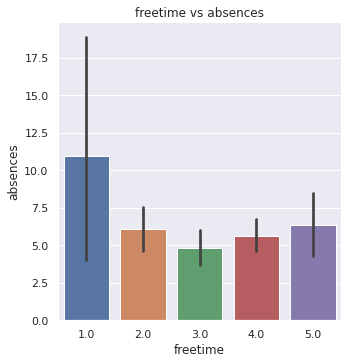

In [ ]:
sns.catplot(
    data=math_df,
    x='freetime',
    y='absences',
    kind='bar',
)
plt.title("freetime vs absences");

Those who had the most amount of absences had the least amount of freetime.

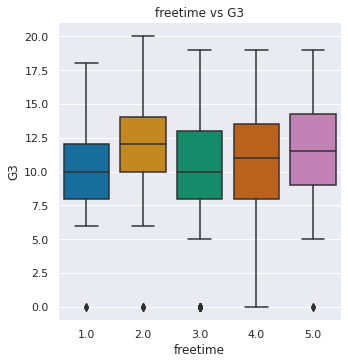

In [ ]:
g=sns.catplot(
    data=math_df,
    x='freetime',
    y='G3',
    kind='box',
    aspect=1,
    palette='colorblind'
)
plt.title("freetime vs G3");

This helps understand why those with no freetime had the lowest grades. They likely had many absences and had to use up their time to catch up and thus had less freetime and likely more stress. This also lets me make an assumption that those with 2 as freetime having the highest grades means they have the most balance. They don't go out too much, but at the same time they aren't always bogged down by classes because of absences.

Last attribute related to social life would be extracuricular activities

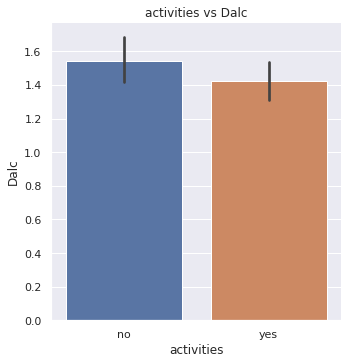

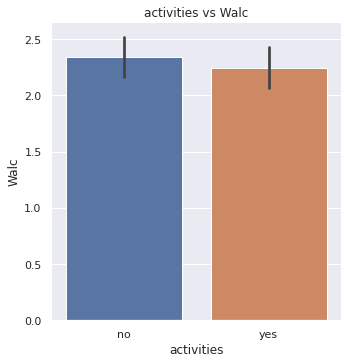

In [ ]:
sns.catplot(
    data=math_df,
    x='activities',
    y='Dalc',
    kind='bar',
)
plt.title("activities vs Dalc");
sns.catplot(
    data=math_df,
    x='activities',
    y='Walc',
    kind='bar',
)
plt.title("activities vs Walc");

Those who take part in extracuricular activities usually end up drinking slightly less than those who don't.

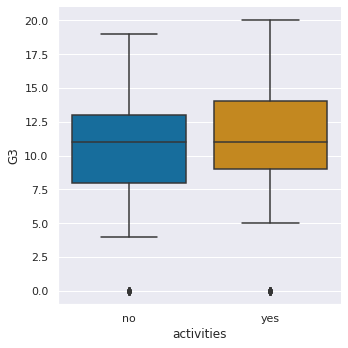

In [ ]:
g=sns.catplot(
    data=math_df,
    x='activities',
    y='G3',
    kind='box',
    aspect=1,
    palette='colorblind'
)

Those who take part in extracuricular activities perform better than those who don't. I believe this is likely because those who take part in extracuricular activities drink less. We've seen that drinking can definitely impact your grades and we know that drinking during the weekdays carries over to the weekends. We can assume that since they're not drinking during the weekdays that they probably aren't on the weekend either.

**Summary**  
The analysis of social aspects of a student's life impacting their performance had us comparing weekday alcohol consumption (Dalc), weekend alcohol consumption (Walc), freetime, studytime, going out (goout), absences, and extracuricular activities (activities). After analyzing each of these aspects, we were better able to understand how these factors could impact a student's grades. From comparing Dalc vs Walc, we noticed that an increase in one led to an increase of the other. Then, when comparing alcohol consumption to grades, we noticed that students who drank more tended to score lower with it being more noticeable for Dalc. When comparing alcohol consumption to going out we found that when students go out they tend to drink. Combined with that we compared freetime with going out and discovered that students who have a lot of freetime tend to go out more. Inversely those who studied more had less freetime. This matched up with the heatmap showing that alcohol consumption had a negative correlation with studying. More studying means less freetime, which meant less going out and consequently less alcoholic consumption. We also looked at absences and found that students with the most absences had the least amount of freetime which explains why students who had the least amount of freetime didn't score the highest. Lastly we looked at activities and found that students who had extracuricular activities drank the least meaning they scored higher on exams when they had extracuricular activities.

# **Predicting Final Grades for Students**

In this section, we will build three different models to predict final grades for students based on the input variables in the dataframe. In this case, since the final grades of students are in the form of continuous numerical values, we can say that this is a regression problem in machine learning.
</br>
</br>
Thus, we will need to use regression models to solve our problem. We will train and test the following three different regression models:
* Linear Regression
* Decision Tree Regressor
* Support Vector Machine
</br>
</br>

We will go more in depth about how each model works, the performance of each model below, and what improvements can be be done to improve our model's performance.

In [ ]:
#importing needed libaries for the section
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Tweaking the dataset**

Based on our previous observations and as seen below, we noticed that most of the variables have low correlations compared to the final grade except for the first and second period grades. 

So the question is: should we train our models solely on input features which don't include on the first and second period grades, or should we include them which can create some model variance?

In order to determine how we should train our models, we will perform cross-validation on our models with the input data without G1 and G2 scores first. Based on the scores, we will then decide to either add G1 and G2 scores or continue.

In [ ]:
correlations = math_df.corr()
output_correlations = abs(correlations["G3"])
print("VARIABLE CORRELATIONS TO FINAL GRADE")
print(output_correlations)
print("\nCORRELATIONS GREATER THAN 0.5")
print(output_correlations[output_correlations>0.5])

VARIABLE CORRELATIONS TO FINAL GRADE
age           0.161579
Medu          0.217147
Fedu          0.152457
traveltime    0.117142
studytime     0.097820
failures      0.360415
famrel        0.051363
freetime      0.011307
goout         0.132791
Dalc          0.054660
Walc          0.051939
health        0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
totalGrade    0.959873
Name: G3, dtype: float64

CORRELATIONS GREATER THAN 0.5
G1            0.801468
G2            0.904868
G3            1.000000
totalGrade    0.959873
Name: G3, dtype: float64


Before performing cross validation on our models, we will need to split the data frame into input and output variables for our model. We will put all columns except G1, G2, G3  into variable ```x ``` *(for now)* and put the final grade column, G3, into variable ```y```.



In [ ]:
x= math_df[math_df.columns[0:30]]
y= math_df.G3
x #input columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,course,other,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,course,other,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0


In [ ]:
y #output columns

0       6.0
1       6.0
2      10.0
3      15.0
4      10.0
       ... 
390     9.0
391    16.0
392     7.0
393    10.0
394     9.0
Name: G3, Length: 395, dtype: float64

**Turning Variables from Categorical to Numerical**

Since we will be utilzing regression models, we will need all our input variables to be a numerical values for all the models to work correctly. We can use the pandas method, ```get_dummies```,  to convert categorical input variables to numerical variables. This will change all columns with categorical values to numerical values. 

For instance, the column sex to sex_F and sex_M and the values for the columns will either be 1 or 0 depending on the sex of the student.

In [ ]:
x_numeric = pd.get_dummies(x)
x_numeric

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,5.0,4.0,11.0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,3.0,4.0,5.0,0.0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


**Splitting the test and training data**

We need to split our input and output variables into testing and training data. Training data will be used to train and validate the models, while testing will be used to test the performance of our models once the model has been finalized. We will use the method ```train_test_split``` to split our dataset into 80% training data and 20% testing data

In [ ]:
#Split test and training data
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.2, random_state=0)

**Creating our Models**

We will now create all three of our models. These models will include
*   **Linear Regression**: Model which first finds a linear function that best fits our input and outputs variables. This function will be then used to determine the final grades.
*   **Decision Tree Regressor**: Model which creates a continous variable decision tree based on our training data to decide the final grade based on the input features.
*   **Support Vector Regression**: Model which finds a hyperplane that fits the most number of points in our training data. We will be using a linear kernel which means the hyperplane shall be in a linear relationship. Its goal is to minimize the amount of error but also maximizing the margin of our hyperplane. 

In [ ]:
#Create Linear Regression Model
linear_regression = LinearRegression()
#Create Decision Tree Regression Model
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
#Create Support Vector Regression Model
support_vector_regression = SVR(kernel="linear")

**Computing Cross Validation Scores**

Cross validation scores will give us insight on how well our model is doing and whether any tweaking is needed before we finalize our models. 

Cross validation works by breaking our training data into X parts, and then for each part, the method will train the model on all data except for that specific part. That one part will be then used to validate the model and give a score based on how accurate it is. 

In our case, we will use a 5-fold cross validation.

In [ ]:
cross_accuracies = cross_val_score(linear_regression, x_train, y_train, cv=5)
print("LINEAR REGRESSION CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG:{sum(cross_accuracies)/5}')
cross_accuracies = cross_val_score(decision_tree_regressor, x_train, y_train, cv=5)
print("\nDECISION TREE CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG:{sum(cross_accuracies)/5}')
cross_accuracies = cross_val_score(support_vector_regression, x_train, y_train, cv=5)
print("\nSUPPORT VECTOR REGRESSION CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG:{sum(cross_accuracies)/5}')

LINEAR REGRESSION CROSS VAL SCORES
[ 0.03580642 -0.07233272  0.00764325 -0.00174784 -0.02026155]
AVG:-0.010178486656174513

DECISION TREE CROSS VAL SCORES
[-0.08437247 -0.78863287 -0.39634601 -0.93505965 -0.32657752]
AVG:-0.5061977035543824

SUPPORT VECTOR REGRESSION CROSS VAL SCORES
[-0.09231037 -0.14862541  0.04935819 -0.16063459  0.067462  ]
AVG:-0.056950035550089304


**Extremely Low Cross Validation Scores**

The cross validation scores of our current models are too low. This can be due to a bad dataset or the models being incorrectly configured. However, all models seemed to be configured correct. Therefore, it seems this is due to the very low correlations of the variables 

**Including the First and Second Period Grades**

Let's include the first and second period grades in our input data, and see how our models perform.

In [ ]:
#Converting categorical input variables to numerical values
x= math_df[math_df.columns[0:32]]
y= math_df.G3
x_numeric = pd.get_dummies(x)
x_numeric

#Split test and training data
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.2, random_state=0)

#Train linear regression model using training data
cross_accuracies = cross_val_score(linear_regression, x_train, y_train, cv=5)
print("LINEAR REGRESSION CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG: {sum(cross_accuracies)/5}')

#Train decision tree regressor using training data
cross_accuracies = cross_val_score(decision_tree_regressor, x_train, y_train, cv=5)
print("\nDECISION TREE CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG: {sum(cross_accuracies)/5}')

#Train support vector Regression
cross_accuracies = cross_val_score(support_vector_regression, x_train, y_train, cv=5)
print("\nSUPPORT VECTOR REGRESSION CROSS VAL SCORES")
print(cross_accuracies)
print(f'AVG: {sum(cross_accuracies)/5}')

LINEAR REGRESSION CROSS VAL SCORES
[0.80871532 0.77742772 0.76211789 0.8160101  0.81536737]
AVG: 0.795927680384048

DECISION TREE CROSS VAL SCORES
[0.68906883 0.69569573 0.72334079 0.84151302 0.95100293]
AVG: 0.7801242576519318

SUPPORT VECTOR REGRESSION CROSS VAL SCORES
[0.78773323 0.84892838 0.73656816 0.83242416 0.84224755]
AVG: 0.8095802957655746


**High Cross Validation Scores**

By including the first and second period grades into our training data, our model is performing extremely better. This must be due to the fact of the high correlations between the variables and G3. Furthermore, it seems that our models are all performing the same, as the average cross validation score for each model is around 80%.

**Training the model**

Now that we are getting high scores for our cross validation scores. Let's train the models and then see how the models perform on our testing data.

In [ ]:
linear_regression.fit(x_train, y_train)
decision_tree_regressor.fit(x_train, y_train)
support_vector_regression.fit(x_train, y_train);

**Testing the model**

Now that our regression models are trained, we can evaluate the performance of the models based on our testing data and determine which one is the best. This can be done through the following metrics: 
*   **Coefficient of Determination**: Also known as the R squared value, this goodness of fit measure implies the percentage of how close the predicted data fits to the true values. This will give us information in how accurate the model is.
*   **Mean Squared Error**: This metric also tells us the average of the squares of the differences between the predicted and true values. A lower the mean squared error is, the better the model is.
*   **Mean Absolute Error**: This metric is similar to the mean squared error except that instead of taking the square of the difference, the metric takes the absolute value of the difference. Just like the previous metric, the lower the score, the better the model is. Unlike Mean Squared Error, Mean Absolute Error does not give a large penalization to errors, but rather treats all errors the same since there is no squaring.


In [ ]:
linear_regression_y_predict = linear_regression.predict(x_test)
decision_tree_y_predict = decision_tree_regressor.predict(x_test)
support_vector_y_predict = support_vector_regression.predict(x_test)

Linear Regression Model Performance

In [ ]:
print(f'Coefficient of Determination: {r2_score(y_test, linear_regression_y_predict)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, linear_regression_y_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, linear_regression_y_predict)}')

Coefficient of Determination: 0.7881438517132657
Mean Squared Error: 5.844867060456095
Mean Absolute Error: 1.6103206586234178


Decision Tree Regressor Model Performance

In [ ]:
print(f'Coefficient of Determination: {r2_score(y_test, decision_tree_y_predict)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, decision_tree_y_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, decision_tree_y_predict)}')

Coefficient of Determination: 0.7756385684914799
Mean Squared Error: 6.189873417721519
Mean Absolute Error: 1.2025316455696202


Support Vector Model Performance

In [ ]:
print(f'Coefficient of Determination: {r2_score(y_test, support_vector_y_predict)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, support_vector_y_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, decision_tree_y_predict)}')

Coefficient of Determination: 0.7793530585657745
Mean Squared Error: 6.087394915883324
Mean Absolute Error: 1.2025316455696202


**True Values vs Predicted Values Graphs** 

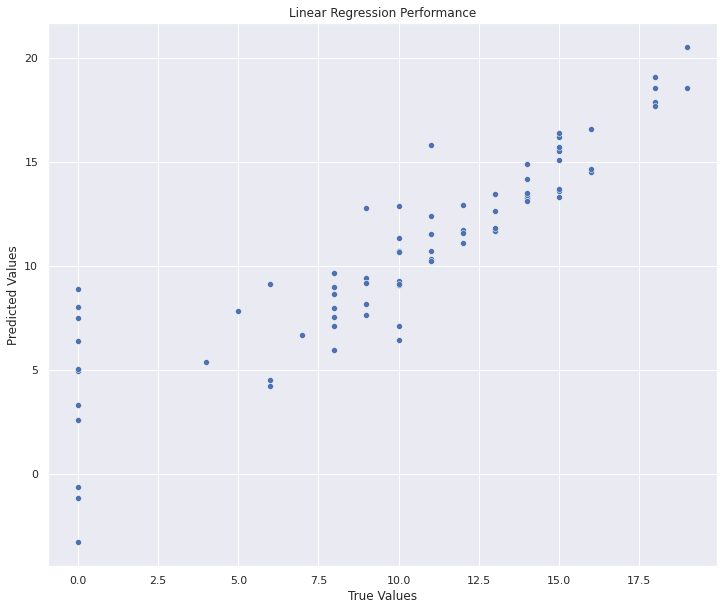

In [ ]:
g = sns.scatterplot(x=y_test, y=linear_regression_y_predict)
g.set_xlabel("True Values")
g.set_ylabel("Predicted Values")
g.set_title("Linear Regression Performance");

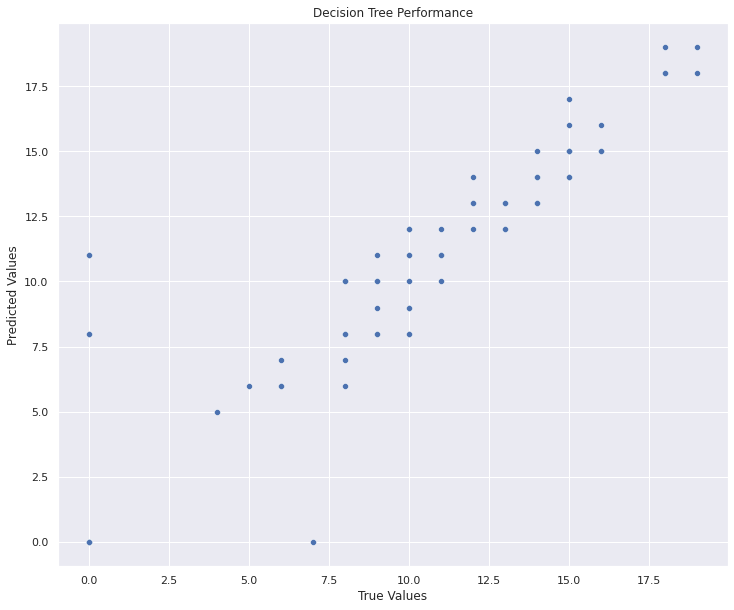

In [ ]:
g = sns.scatterplot(x=y_test, y=decision_tree_y_predict)
g.set_xlabel("True Values")
g.set_ylabel("Predicted Values")
g.set_title("Decision Tree Performance");

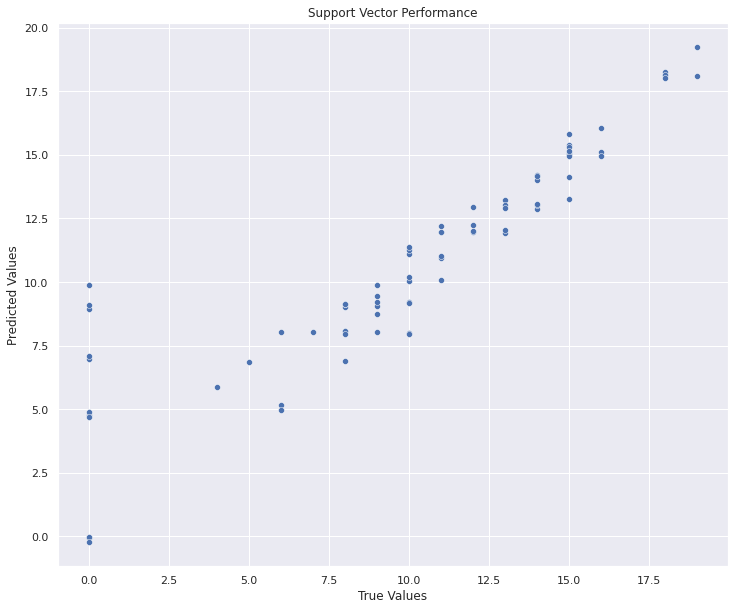

In [ ]:
g = sns.scatterplot(x=y_test, y=support_vector_y_predict)
g.set_xlabel("True Values")
g.set_ylabel("Predicted Values")
g.set_title("Support Vector Performance");

**Results of Model Performances**

Based on our models performance we can draw the following conclusions:
- Although all models perform very well, the Linear Regression Model seems to be performing a little better than the other models. The model performance on our testing data showed that the Linear Regression model had the highest R squared score. Furthermore,  even though the model has more errors as seen in its mean absolute error, the model's errors were not as severe as the other models' errors as seen in the mean squared error which gives higher penalizations to bigger errors. Therefore, the Linear Regression Model gives the best prediction results.

We can also draw these conclusions while training and tweaking our model: 
- All models perform poorly if the input variables do not contain G1 and G2 scores.
- There is not enough correlation between the variables (except G1 and G2) and G3 so predicition models can not be created solely based on the other variables alone.

# **Conclusion**

Through our data analysis, we were able to explore several different components that may impact our grades and conclude that the education of parents positively correlated with getting higher grades, and that lower failures led to higher grades. However, we can also conclude that there aren't any big correlations for the majority of the other personal or social variables with a student's academic performance. This could mean that either the sample size is too small, or there is truly no correlations between the variables and the final grades after all. 

Which means for you alcoholics out there: **No**, there is no real correlation between drinking and academic performance *based on the recorded observations*. 🙂🤝🍹

Furthermore even though, there were correlations between some of the variables, the correlations were not strong enough for us to develop any model that would predict final grades without including G1 and G2 as the features. We also concluded that a linear regression model performs that best on our data when compared to the other models. 

Now that we know what impacts or doesn't impact our grades, lets drink to aceing our finals. 🎓

<img src="https://i.kym-cdn.com/photos/images/facebook/001/259/121/809.png" width=500> </br>
*Source: https://i.kym-cdn.com/photos/images/facebook/001/259/121/809.png*